In [78]:
import sys
import numpy
import pandas
import matplotlib
import seaborn # to use correlation matrix
import scipy
import sklearn

#import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
#Loading the dataset from the csv file using pandas
data =pd.read_csv('glass-0-1-2-3_vs_4-5-6.csv', header = None)

In [80]:
#exploring the dataset
print(data.columns)
#Result of the PCA dimensionality reduction for privacy purpose

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64')


In [81]:
print(data.shape)

(214, 10)


In [82]:
data.columns=['v1','v2','v3','v4','v5','v6','v7','v8','v9','Class']

In [83]:
print(data.describe())
print(data.shape)

               v1            v2           v3          v4            v5  \
count  214.000000    214.000000   214.000000  214.000000    214.000000   
mean     1.518366    980.688157    52.989301    1.444895  12613.121321   
std      0.003037   3538.105952   422.981011    0.499361  27494.343383   
min      1.511150     10.730000     0.000000    0.290000     69.810000   
25%      1.516526     12.942788     2.113668    1.188800     72.394400   
50%      1.517688     13.346775     3.479750    1.358930     72.957200   
75%      1.519163     13.986838     3.609960    1.628570     73.388400   
max      1.533930  15126.000000  3592.000000    3.500000  73702.000000   

               v6            v7          v8          v9       Class  
count  214.000000    214.000000  214.000000  214.000000  214.000000  
mean    17.891039    313.356772    0.177563   15.279695    0.238318  
std    102.675204   1672.968946    0.497925   76.941003    0.427053  
min      0.000000      5.430000    0.000000    0.0000

In [84]:
data = data.sample(frac=0.2,random_state=1)

print(data.shape)


(43, 10)


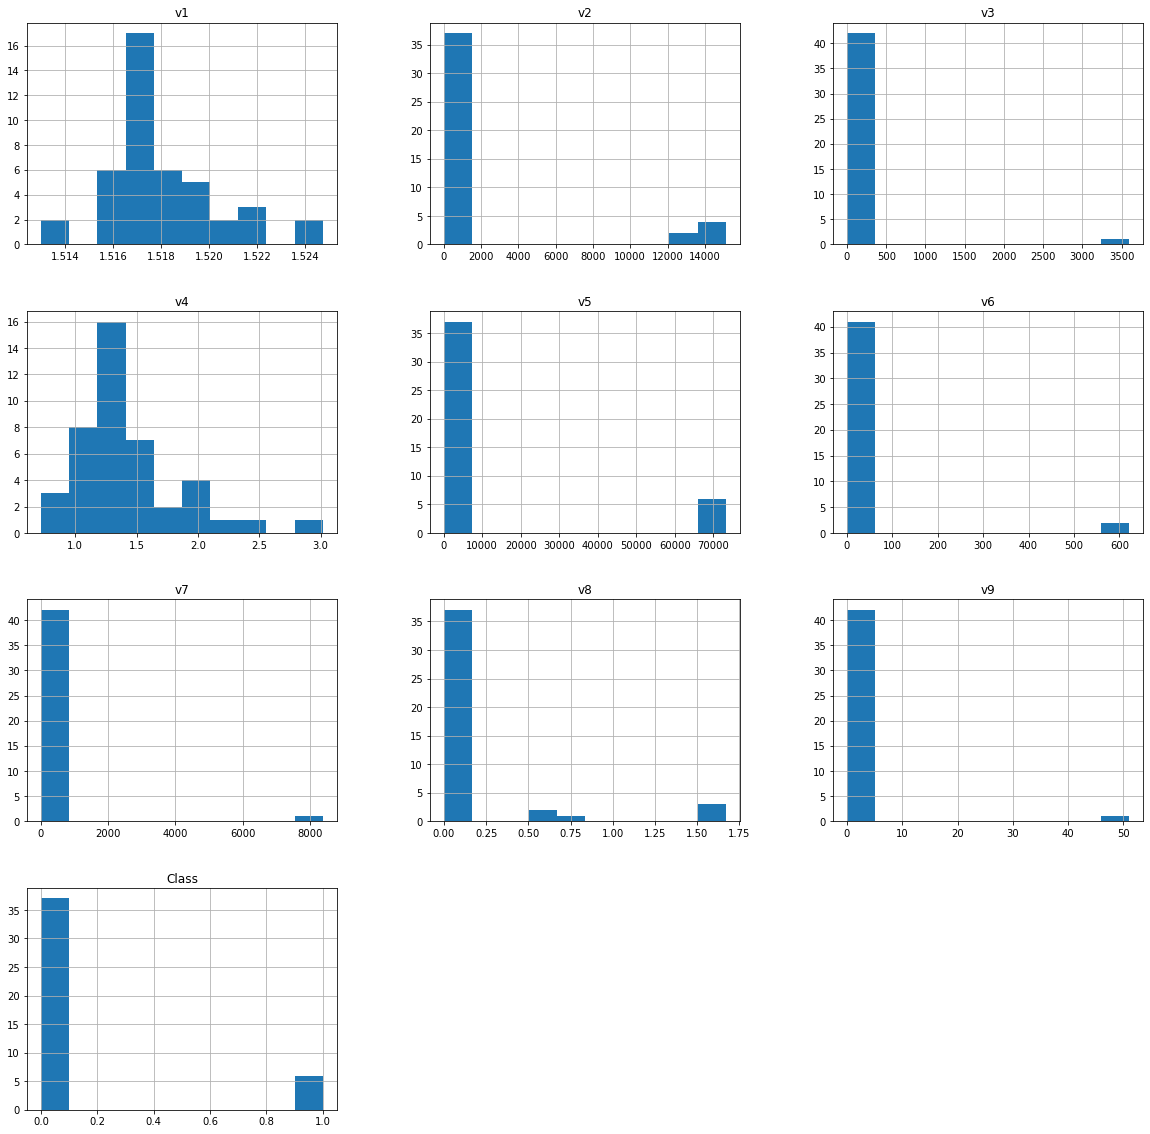

In [85]:
#Plot histogram of each paramater
data.hist(figsize=(20,20))
plt.show()

In [86]:
# Determine number of fraud cases in dataset
Fraud=data[data['Class']==1]
Valid=data[data['Class']==0]

outlier_fraction =len(Fraud)/ float(len(Valid))
print(outlier_fraction)

print('Fraud Cases: {}'.format(len(Fraud)))
print('Valid Cases: {}'.format(len(Valid)))

0.16216216216216217
Fraud Cases: 6
Valid Cases: 37


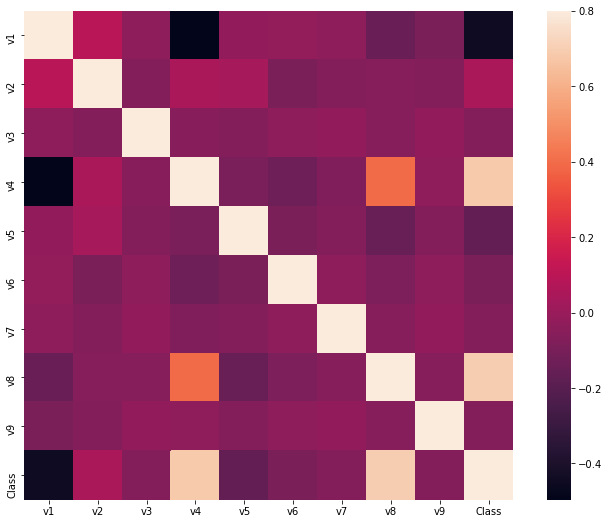

In [87]:
#Correlation matrix
corrmat=data.corr()
fig=plt.figure(figsize = (12,9))

sns.heatmap(corrmat,vmax=.8,square=True)
plt.show()

In [88]:
#Get all the columns from the DataFrame
columns=data.columns.tolist()

#Filter the columns to remove data we do not want
columns=[c for c in columns if c not in ['Class']]

#store the variable we'll be predicting on
target="Class"

X=data[columns]
Y=data[target]

#Print the shapes of X and Y
print(X.shape)
print(Y.shape)

(43, 9)
(43,)


In [92]:
from sklearn.metrics import classification_report, accuracy_score
#ALGORITHMS Used.
#Anomaly detection methods IsolationForest, LocalOutlierFactor from sklearn package.
#LocalOutlierFactor is an unsupervised Outlier Detection Method.It calculates the anomaly score of each sample called LocalOutlierFactor.It measures the local deviation of density of a given sample from its neighbours.It is local in that anomaly score depends on how isoated that object is with respect to the surroundinghood.Same K-Nearest Neighbour Method.
#Isolation Forest Algorithm works differently.It returns the anomaly score of each sample using this isolation forest method.It isolates the observation by randomly selecting a feature and randomly selecting a swift value between the maximum and minimum values of the select feature.
#Recursive partitioning can be represented by a tree structure the number of splittings required to isolate the sample is equal to path length from the root node to the terminating node.Random partitioning produces shorter paths for anomalies hence random forest if produces path links for a particular sample they are highly likely to be anomalies.


from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
#define a random state
state=1

#define the outlier detection method
classifiers={
    "Isolation Forest":IsolationForest(max_samples=len(X),contamination=outlier_fraction,random_state=state),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20,contamination=outlier_fraction),
    "One Class SVM":OneClassSVM(gamma='auto',nu=0.5)
}

In [95]:


#Fit the model
n_outliers=len(Fraud)

for i,(clf_name,clf) in enumerate(classifiers.items()):
    
    #fit the data and tag outliers
    if clf_name=="Local Outlier Factor":
        y_pred=clf.fit_predict(X)
        scores_pred=clf.negative_outlier_factor_
    else:
        clf.fit(X)
        scores_pred=clf.decision_function(X)
        y_pred=clf.predict(X)
        
    #Reshape the prediction values to 0 for valid, 1 for fraud
    y_pred[y_pred==1]=0
    y_pred[y_pred==-1]=1
    
    n_errors= (y_pred !=Y).sum()
    

    #Run classification metrics
    print('{}:{}'.format(clf_name, n_errors))
    print(accuracy_score(Y,y_pred))
    print(classification_report(Y,y_pred))

Isolation Forest:9
0.7906976744186046
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        37
           1       0.29      0.33      0.31         6

    accuracy                           0.79        43
   macro avg       0.59      0.60      0.59        43
weighted avg       0.80      0.79      0.80        43

Local Outlier Factor:11
0.7441860465116279
              precision    recall  f1-score   support

           0       0.86      0.84      0.85        37
           1       0.14      0.17      0.15         6

    accuracy                           0.74        43
   macro avg       0.50      0.50      0.50        43
weighted avg       0.76      0.74      0.75        43

One Class SVM:16
0.627906976744186
              precision    recall  f1-score   support

           0       0.92      0.62      0.74        37
           1       0.22      0.67      0.33         6

    accuracy                           0.63        43
   macro avg